# Ranking Features of a Smartphone

## Dataset information

- battery_power - Total energy a battery can store in one time measured in mAh
- blue - Has bluetooth (1) or not (0)
- clock_speed - speed at which microprocessor executes instructions
- dual_sim - Has dual sim support (1) or not (0)
- fc - Front Camera mega pixels
- four_g - Has 4G (1) or not (0)
- int_memory - Internal Memory in Gigabytes
- m_dep - Mobile Depth in cm
- mobile_wt - Weight of mobile phone
- n_cores - Number of cores of processor
- pc - Primary Camera mega pixels
- px_height - Pixel Resolution Height
- px_width - Pixel Resolution Width
- ram - Random Access Memory in Mega Bytes
- sc_h - Screen Height of mobile in cm
- sc_w - Screen Width of mobile in cm
- talk_time - longest time that a single battery charge will last
- three_g - Has 3G (1) or not (0)
- touch_screen - Has touch screen (1) or not (0)
- wifi - Has wifi (1) or not (0)
- price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("MobileTrain.csv")
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


___
# EDA

In [4]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [15]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


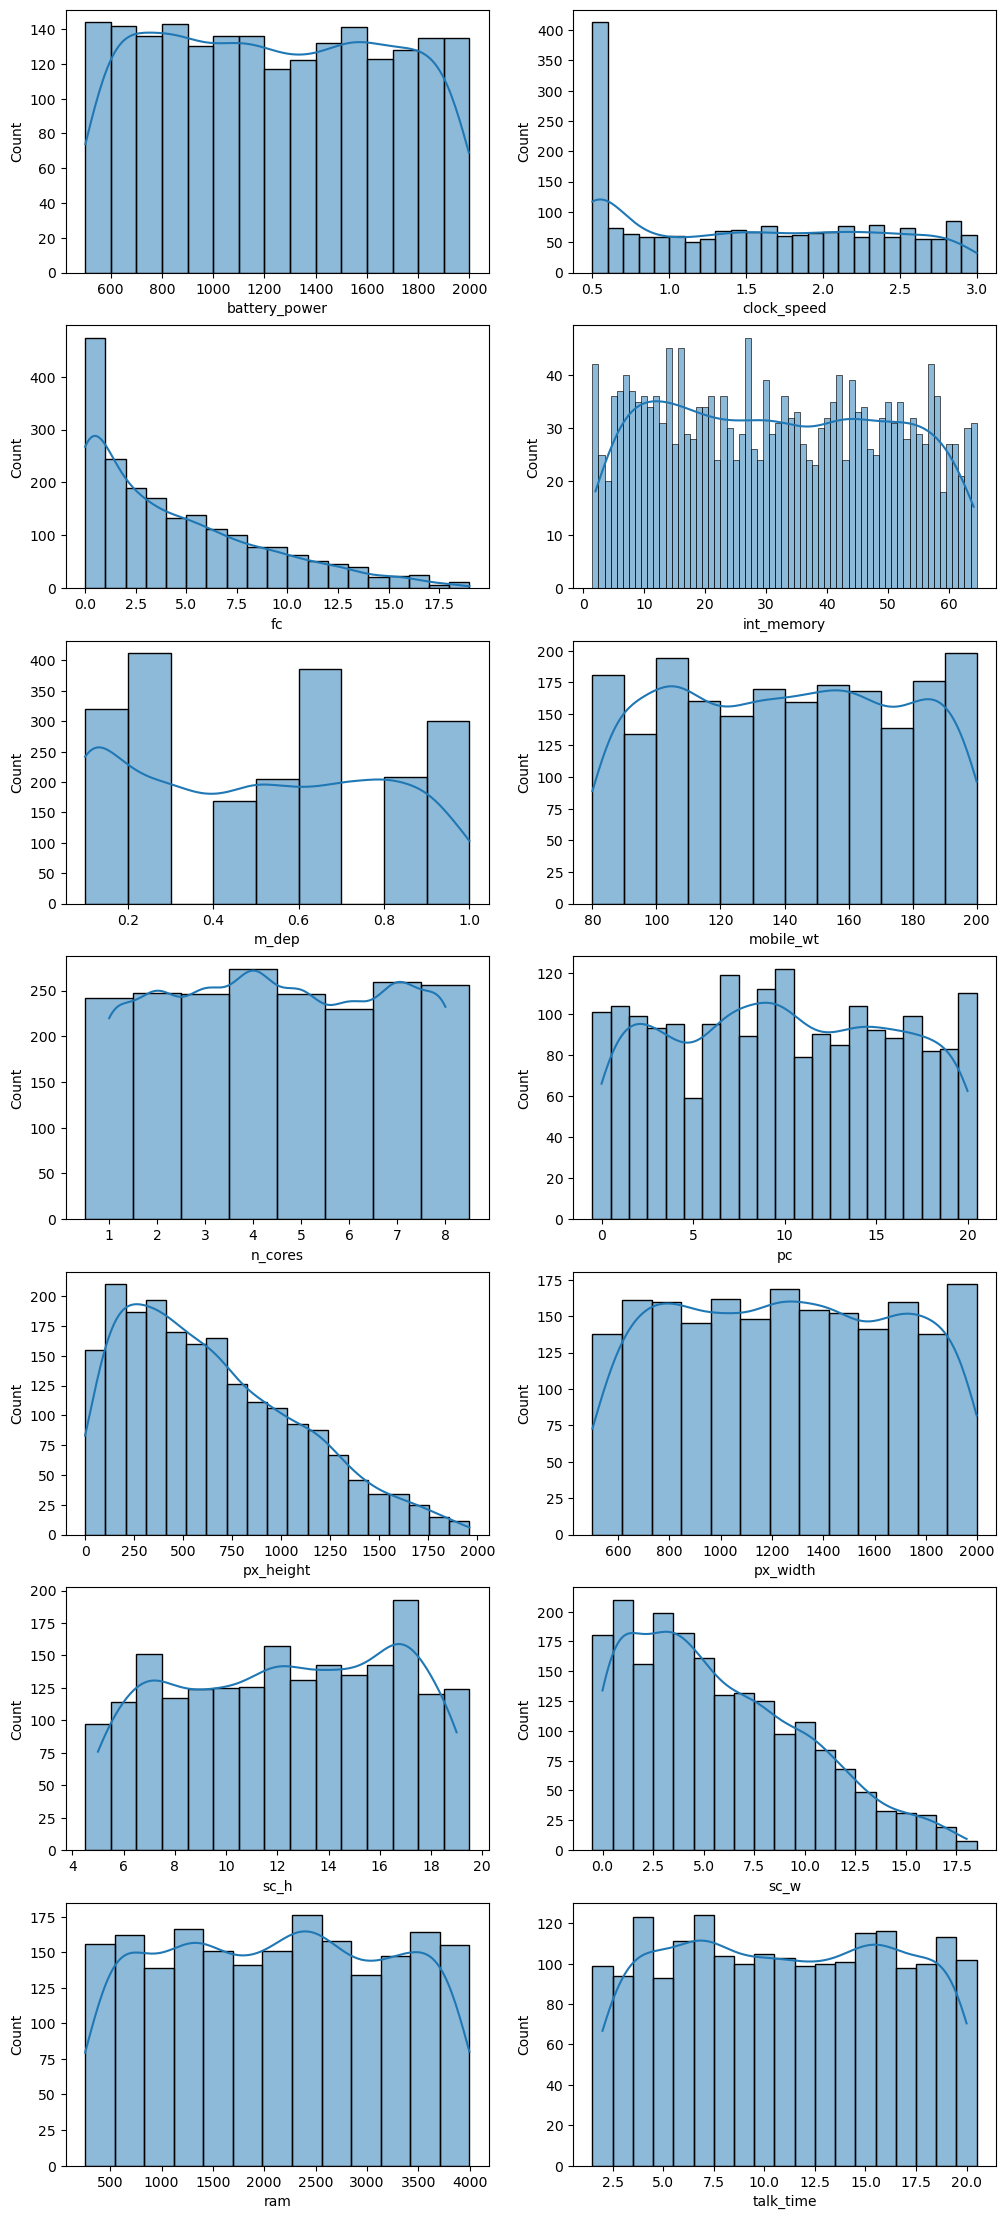

In [51]:
fig, axes = plt.subplots(7, 2, figsize=(12,28))
sns.histplot(data, x = 'battery_power', kde = True, bins = np.arange(500,2100,100), ax = axes[0][0])
sns.histplot(data, x = 'clock_speed', binwidth=0.1, kde = True, ax = axes[0][1])
sns.histplot(data, x = 'fc', kde = True, bins = np.arange(0, 20, 1), ax = axes[1][0])
sns.histplot(data, x = 'int_memory', discrete = True, kde = True, ax = axes[1][1])
sns.histplot(data, x = 'm_dep', binwidth=0.1, kde = True, ax = axes[2][0])
sns.histplot(data, x = 'mobile_wt', binwidth=10, kde = True, ax = axes[2][1])
sns.histplot(data, x = 'n_cores', discrete = True, kde = True, ax = axes[3][0])
sns.histplot(data, x = 'pc', discrete = True, kde = True, ax = axes[3][1])
sns.histplot(data, x = 'px_height', kde = True, ax = axes[4][0])
sns.histplot(data, x = 'px_width', kde = True, ax = axes[4][1])
sns.histplot(data, x = 'sc_h', discrete = True, kde = True, ax = axes[5][0])
sns.histplot(data, x = 'sc_w', discrete = True, kde = True, ax = axes[5][1])
sns.histplot(data, x = 'ram', kde = True, ax = axes[6][0])
sns.histplot(data, x = 'talk_time', discrete = True, kde = True, ax = axes[6][1])
plt.show()

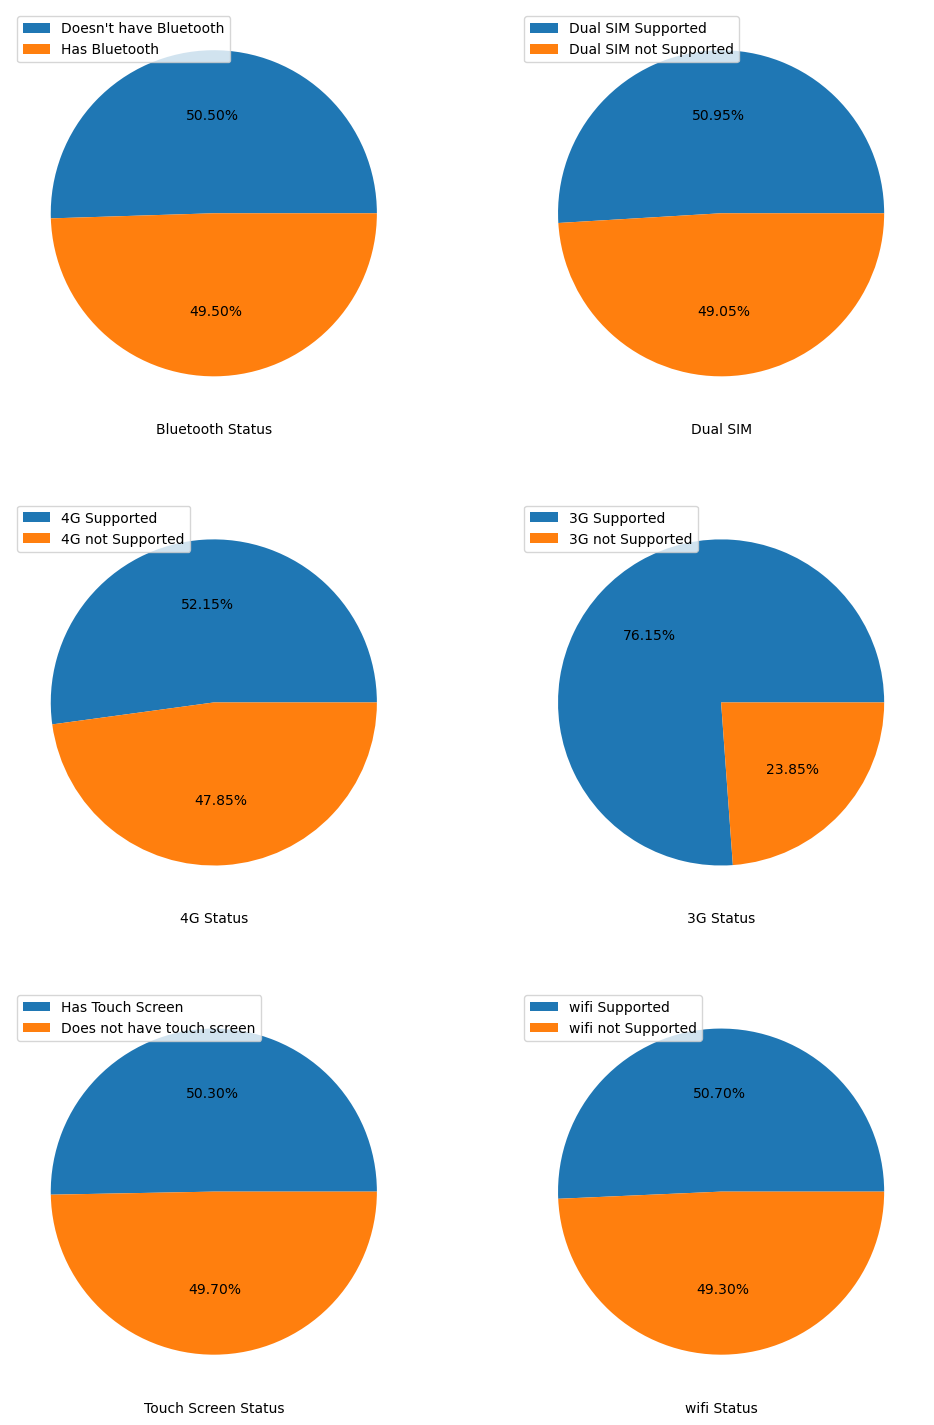

In [76]:
fig, axes = plt.subplots(3,2,figsize = (12,18))

data['blue'].value_counts().plot.pie(autopct = '%.2f%%', labeldistance=None, ax = axes[0][0])
axes[0][0].legend(["Doesn't have Bluetooth", 'Has Bluetooth'], loc = 'upper left')
axes[0][0].set_ylabel("")
axes[0][0].set_xlabel("Bluetooth Status")

data['dual_sim'].value_counts().plot.pie(autopct = '%.2f%%', labeldistance=None, ax = axes[0][1])
axes[0][1].legend(["Dual SIM Supported", 'Dual SIM not Supported'], loc = 'upper left')
axes[0][1].set_ylabel("")
axes[0][1].set_xlabel("Dual SIM")

data['four_g'].value_counts().plot.pie(autopct = '%.2f%%', labeldistance=None, ax = axes[1][0])
axes[1][0].legend(["4G Supported", '4G not Supported'], loc = 'upper left')
axes[1][0].set_ylabel("")S
axes[1][0].set_xlabel("4G Status")

data['three_g'].value_counts().plot.pie(autopct = '%.2f%%', labeldistance=None, ax = axes[1][1])
axes[1][1].legend(["3G Supported", '3G not Supported'], loc = 'upper left')
axes[1][1].set_ylabel("")
axes[1][1].set_xlabel("3G Status")

data['touch_screen'].value_counts().plot.pie(autopct = '%.2f%%', labeldistance=None, ax = axes[2][0])
axes[2][0].legend(["Has Touch Screen", 'Does not have touch screen'], loc = 'upper left')
axes[2][0].set_ylabel("")
axes[2][0].set_xlabel("Touch Screen Status")

data['wifi'].value_counts().plot.pie(autopct = '%.2f%%', labeldistance=None, ax = axes[2][1])
axes[2][1].legend(["wifi Supported", 'wifi not Supported'], loc = 'upper left')
axes[2][1].set_ylabel("")
axes[2][1].set_xlabel("wifi Status")

plt.show()

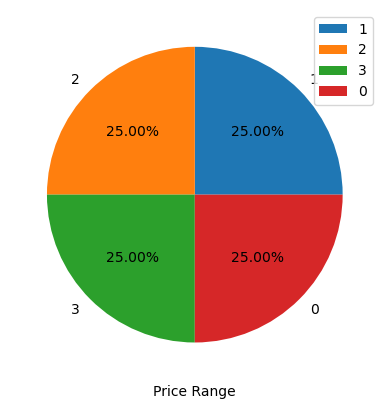

In [79]:
data['price_range'].value_counts().plot.pie(autopct = '%.2f%%')
plt.legend()
plt.ylabel("")
plt.xlabel("Price Range")
plt.show()